In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',45)
pd.set_option('display.max_rows',25)

# Exploratory data analysis

In [3]:
#Put your file path.
df = pd.read_excel(r'c:\Users\Admin\Desktop\Dataset\Global Superstore 2018.xlsx')
print(df.shape)
df.head()

(51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium


In [6]:
#checking for null values 
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Product Name              object
Sub-Category              object
Category                  object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [8]:
#Oldest and most recent order dates.
print(df['Order Date'].max())
print(df['Order Date'].min())

2017-12-31 00:00:00
2014-01-01 00:00:00


In [9]:
#No. of unique customers.
df['Customer ID'].nunique()

17415

In [10]:
#No. of unique orders placed.
df['Order ID'].nunique()

25728

In [11]:
print(df['Country'].nunique())
print(df['City'].nunique())
print(df['City'].value_counts(normalize=True).head(10))
print(df['City'].value_counts(normalize=True).head(10).sum())


165
3650
New York City    0.017840
Los Angeles      0.014564
Philadelphia     0.010470
San Francisco    0.009943
Santo Domingo    0.008637
Manila           0.008423
Seattle          0.008345
Houston          0.007350
Tegucigalpa      0.007058
Jakarta          0.006570
Name: City, dtype: float64
0.099200623903295


# Top 3 insights
-165 unique countries where items have been shipped.

-3650 unique cities where items have been shipped.

-Around 10% of orders come from following 10 cities


In [12]:
top_cities = pd.DataFrame({'% of Customers':df['City'].value_counts(normalize=True)}).reset_index().sort_values('% of Customers',ascending=False).head(10)
top_cities['% of Customers'] = top_cities['% of Customers']*100
top_cities

,index,% of Customers
0,New York City,1.783973
1,Los Angeles,1.456424
2,Philadelphia,1.046988
3,San Francisco,0.994346
4,Santo Domingo,0.863716
5,Manila,0.842269
6,Seattle,0.834471
7,Houston,0.735036
8,Tegucigalpa,0.705791
9,Jakarta,0.657048


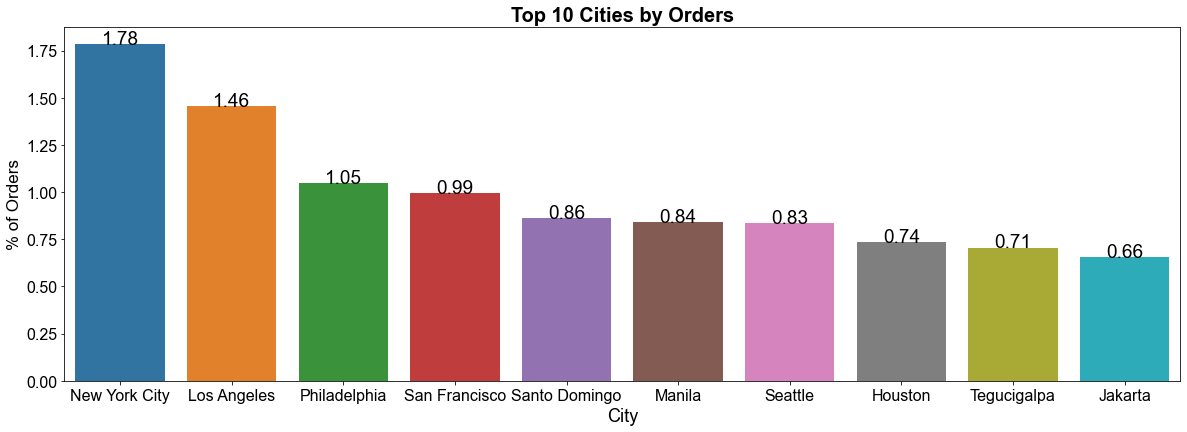

In [13]:
h = sns.barplot(data=top_cities,x='index',y='% of Customers')
for index, row in top_cities.iterrows():
    h.text(row.name,row['% of Customers'], round(row['% of Customers'],2), fontsize= 19, color='black', ha="center")
plt.gcf().set_size_inches(20,6.5)
plt.xlabel('City',fontsize=18)
plt.ylabel('% of Orders',fontsize=17)
plt.tick_params(axis='both', labelsize=16)
plt.title('Top 10 Cities by Orders',fontsize=20,fontweight='bold')
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'})

In [14]:
print(df['Country'].nunique())
print(df['Country'].value_counts(normalize=True).head(10))
df['Country'].value_counts(normalize=True).head(10).sum()
#Out of total 165 countries, around 55% customers hail from following 10 countries.

165
United States     0.194853
Australia         0.055313
France            0.055118
Mexico            0.051375
Germany           0.040222
China             0.036654
United Kingdom    0.031839
Brazil            0.031059
India             0.030298
Indonesia         0.027101
Name: Country, dtype: float64


0.5538311561707935

In [15]:
top_countries = pd.DataFrame({'% of Customers':df['Country'].value_counts(normalize=True)}).reset_index().sort_values('% of Customers',ascending=False).head(10)
top_countries['% of Customers'] = top_countries['% of Customers']*100
top_countries

,index,% of Customers
0,United States,19.485280
1,Australia,5.531293
2,France,5.511796
3,Mexico,5.137454
4,Germany,4.022227
5,China,3.665432
6,United Kingdom,3.183857
7,Brazil,3.105869
8,India,3.029830
9,Indonesia,2.710080


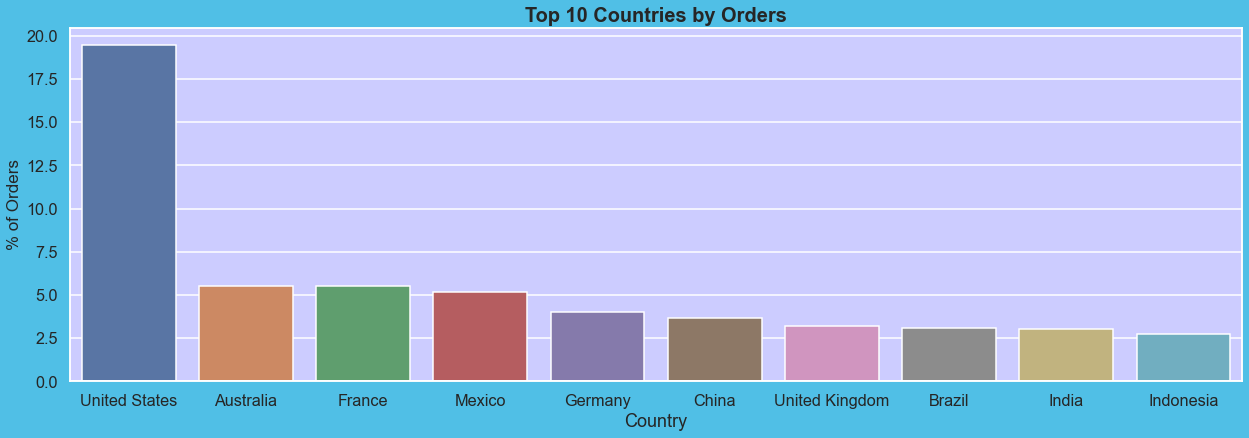

In [16]:
sns.set_context('talk',font_scale=1.5)
sns.barplot(data=top_countries,x='index',y='% of Customers')
plt.gcf().set_size_inches(21,6.5)
plt.xlabel('Country',fontsize=18)
plt.ylabel('% of Orders',fontsize=17)
plt.tick_params(axis='both', labelsize=16.2)
plt.title('Top 10 Countries by Orders',fontsize=20,fontweight='bold')
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'})

In [17]:
print(df['Region'].value_counts(normalize=True).tail(10))
df['Region'].value_counts(normalize=True).head(10).sum()
#Around 68% of customers hail from following 10 regions alone.

Caribbean          0.032950
Southern US        0.031585
Eastern Europe     0.029811
Western Africa     0.028466
North Africa       0.024917
Eastern Africa     0.014194
Central Africa     0.012537
Southern Africa    0.009320
Canada             0.007487
Central Asia       0.004231
Name: Region, dtype: float64


0.6750438682004289

In [18]:
top_region = pd.DataFrame({'% of Customers':df['Region'].value_counts(normalize=True)}).reset_index().sort_values('% of Customers',ascending=False).head(10)
top_region['% of Customers'] = top_region['% of Customers']*100
top_region

,index,% of Customers
0,Western Europe,11.470072
1,Central America,10.949503
2,Oceania,6.798596
3,Western US,6.244882
4,Southeastern Asia,6.100604
5,South America,5.825697
6,Eastern US,5.552739
7,Southern Asia,5.176448
8,Western Asia,4.757263
9,Eastern Asia,4.628583


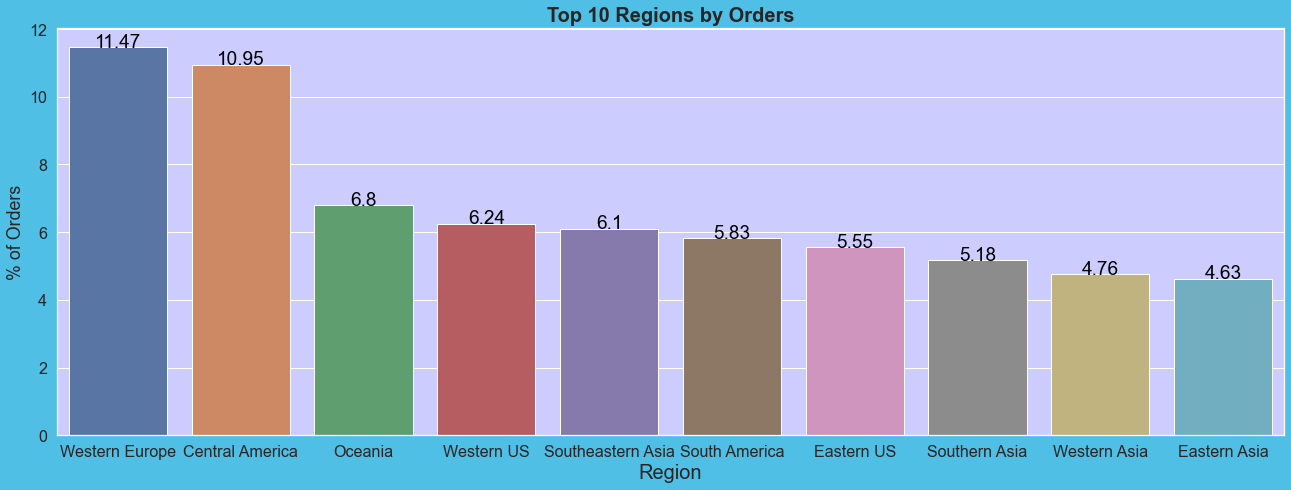

In [19]:
h = sns.barplot(data=top_region,x='index',y='% of Customers')
for index, row in top_region.iterrows():
    h.text(row.name,row['% of Customers'], round(row['% of Customers'],2), fontsize= 19, color='black', ha="center")
plt.gcf().set_size_inches(22,7.5)
plt.xlabel('Region',fontsize=20)
plt.ylabel('% of Orders',fontsize=17.8)
plt.tick_params(axis='both', labelsize=16.1)
plt.title('Top 10 Regions by Orders',fontsize=20,fontweight='bold')
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'})

In [20]:
df['Market'].value_counts(normalize=True)
#Asia Pacific market has highest customers among all at around 28%. Africa has the least at around 9%.

Asia Pacific    0.278846
Europe          0.228680
USCA            0.202340
LATAM           0.200702
Africa          0.089433
Name: Market, dtype: float64

In [21]:
pie_market = pd.DataFrame({'% of Customers':df['Market'].value_counts(normalize=True)}).reset_index()
pie_market

,index,% of Customers
0,Asia Pacific,0.278846
1,Europe,0.228680
2,USCA,0.202340
3,LATAM,0.200702
4,Africa,0.089433


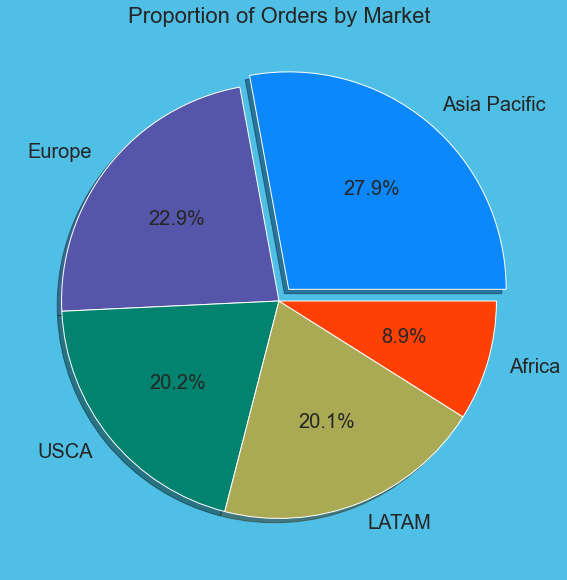

In [22]:
color = ['#0c88fb','#5555aa','#018370','#aaaa55','#ff4004']
exp = [0.07,0,0,0,0] 
plt.pie(pie_market['% of Customers'],labels=pie_market['index'],colors=color,explode=exp,shadow=True,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.gcf().set_size_inches(19,10) 
plt.title('Proportion of Orders by Market',fontsize=22)
sns.set(rc={'figure.facecolor':'#F08080'})#'axes.facecolor':'#ccccff'

In [23]:
df['Category'].value_counts(normalize=True)
#Around 60% orders are office supplies. With furniture and Tech items almost equal in orders.

Office Supplies    0.610041
Technology         0.197719
Furniture          0.192240
Name: Category, dtype: float64

In [24]:
pie_category = pd.DataFrame({'Prop. of Customers':df['Category'].value_counts(normalize=True)}).reset_index()
pie_category

,index,Prop. of Customers
0,Office Supplies,0.610041
1,Technology,0.197719
2,Furniture,0.192240


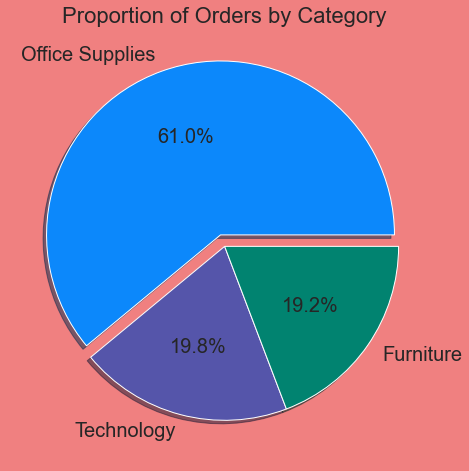

In [25]:
color = ['#0c88fb','#5555aa','#018370']
exp = [0.07,0,0] 
plt.pie(pie_category['Prop. of Customers'],labels=pie_category['index'],colors=color,explode=exp,shadow=True,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.gcf().set_size_inches(19,8) 
plt.title('Proportion of Orders by Category',fontsize=22)
sns.set(rc={'figure.facecolor':'#F08080'})#'axes.facecolor':'#ccccff'

In [26]:
c2 = df.groupby('Category')[['Sales']].sum()
c3 = c2.apply(lambda x: 100*x/x.sum())
c3.reset_index(inplace=True)
c3

,Category,Sales
0,Furniture,32.512962
1,Office Supplies,29.958410
2,Technology,37.528628


In [29]:
df.groupby('Category').agg({'Sales':'sum'})

,Sales
Category,
Furniture,4.110452e+06
Office Supplies,3.787493e+06
Technology,4.744557e+06


In [30]:
#Proportion of items ordered in each category.
df.groupby('Category')['Sub-Category'].value_counts(normalize=True)

Category         Sub-Category
Furniture        Chairs          0.348276
                 Furnishings     0.319878
                 Bookcases       0.244523
                 Tables          0.087323
Office Supplies  Binders         0.196427
                 Storage         0.161367
                 Art             0.155454
                 Paper           0.111605
                 Fasteners       0.083128
                 Labels          0.083128
                 Supplies        0.076928
                 Envelopes       0.076289
                 Appliances      0.055675
Technology       Phones          0.331032
                 Accessories     0.303225
                 Copiers         0.219209
                 Machines        0.146534
Name: Sub-Category, dtype: float64

# Some insights

-In Furniture category, Chairs and Furnishings constitute around 65% of the orders.

-In Office Supplies category, Binders, Storage, Art and Paper make up for around 62% of the orders.

-While in Tech category, the Phones and Accessories make up for around 63% of the orders.



In [31]:
sub1 = pd.DataFrame({'Proportion of Orders':df.groupby('Category')['Sub-Category'].value_counts(normalize=True)}).reset_index()
sub1['Proportion of Orders'] = sub1['Proportion of Orders']*100 
sub1

,Category,Sub-Category,Proportion of Orders
0,Furniture,Chairs,34.827586
1,Furniture,Furnishings,31.987830
2,Furniture,Bookcases,24.452333
3,Furniture,Tables,8.732252
4,Office Supplies,Binders,19.642686
5,Office Supplies,Storage,16.136661
6,Office Supplies,Art,15.545399
7,Office Supplies,Paper,11.160472
8,Office Supplies,Fasteners,8.312826
9,Office Supplies,Labels,8.312826


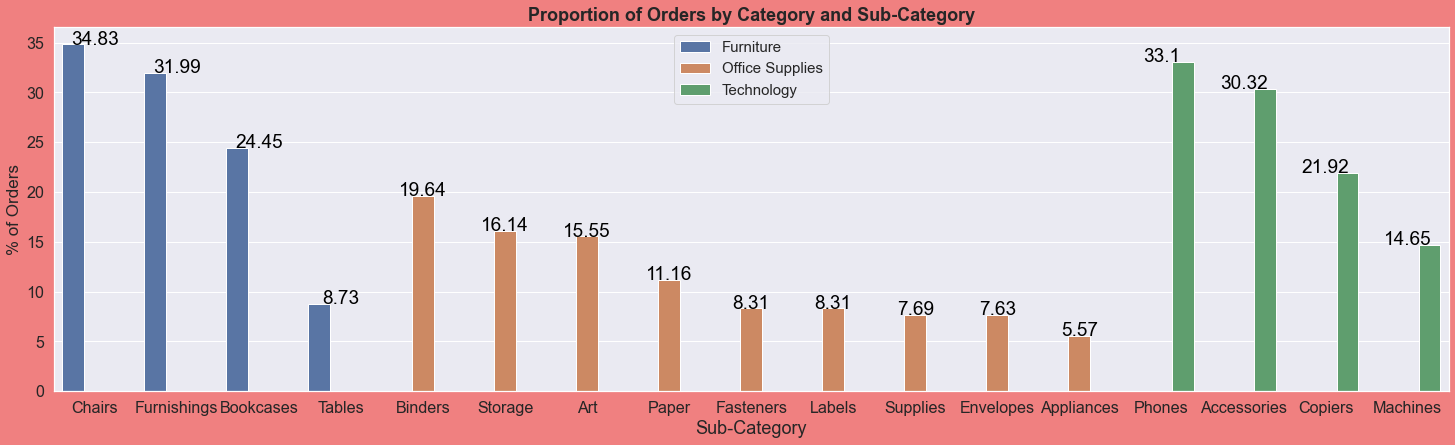

In [32]:
g = sns.barplot(data=sub1,x='Sub-Category',y='Proportion of Orders',hue='Category')
for index, row in sub1.iterrows():
    g.text(row.name,row['Proportion of Orders'], round(row['Proportion of Orders'],2), fontsize= 19, color='black', ha="center")
plt.ylabel('% of Orders',fontsize=17)
plt.xlabel('Sub-Category',fontsize=18)
plt.legend(loc='upper center',prop={'size': 15})
plt.tick_params(axis='both', labelsize=16.1)
plt.title('Proportion of Orders by Category and Sub-Category',fontsize=18,fontweight='bold')
plt.gcf().set_size_inches(25,6.7)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'pink'})

In [34]:
#Proportion of sales of items in each sub-category.
ab = df.groupby(['Category','Sub-Category']).agg({'Sales':'sum'})
c = df.groupby('Category').agg({'Sales':'sum'})
ab.div(c,level='Category')*100
sub2 = pd.DataFrame(ab.div(c,level='Category')*100).sort_values(['Category','Sales'],ascending=False).reset_index()
sub2


,Category,Sub-Category,Sales
0,Technology,Phones,35.974359
1,Technology,Copiers,31.814058
2,Technology,Machines,16.420079
3,Technology,Accessories,15.791505
4,Office Supplies,Storage,29.750896
5,Office Supplies,Appliances,26.680859
6,Office Supplies,Binders,12.194596
7,Office Supplies,Art,9.811588
8,Office Supplies,Supplies,6.410868
9,Office Supplies,Paper,6.383842


# Some insights

-The sales figures portray a very different picture compared to the orders placed.

-The furnishings sub-category had around 32% orders placed, however it generates only 9% of total sales

-Similarly Storage and Appliances produce the most sales under Office Supplies, however Appliances were ordered only 5% times.

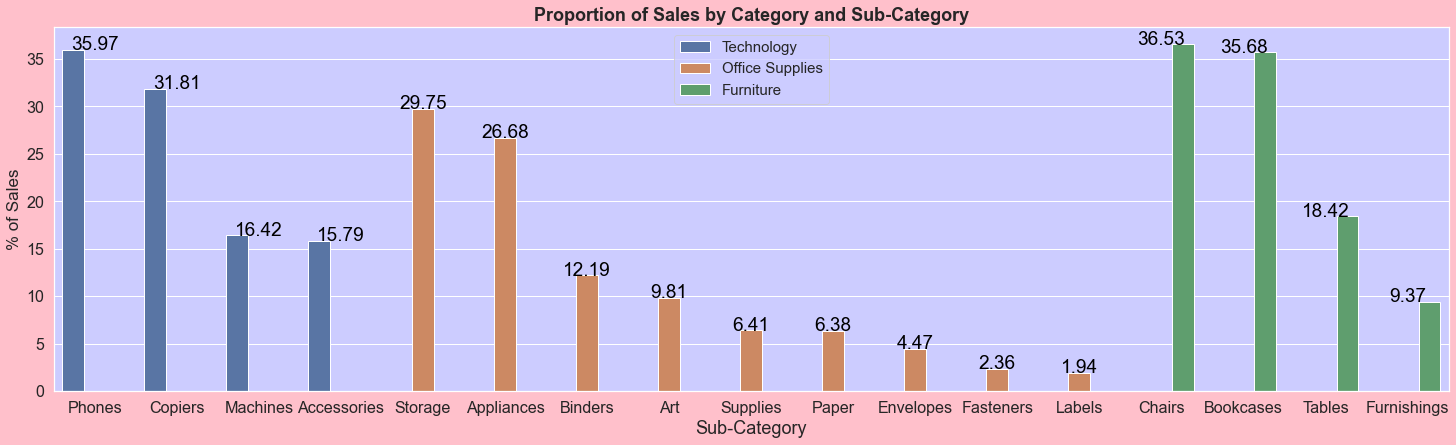

In [35]:
h = sns.barplot(data=sub2,x='Sub-Category',y='Sales',hue='Category')
for index, row in sub2.iterrows():
    h.text(row.name,row['Sales'], round(row['Sales'],2), fontsize= 19, color='black', ha="center")
plt.ylabel('% of Sales',fontsize=17)
plt.xlabel('Sub-Category',fontsize=18)
plt.legend(loc='upper center',prop={'size': 15})
plt.tick_params(axis='both', labelsize=16.1)
plt.title('Proportion of Sales by Category and Sub-Category',fontsize=18,fontweight='bold')
plt.gcf().set_size_inches(25,6.7)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'pink'})#2e8b57

In [36]:
#Mode of shipment ordered.
df['Ship Mode'].value_counts(normalize=True)
#Almost 60% chose the default standard shipment.

Standard Class    0.600019
Second Class      0.200994
First Class       0.146325
Same Day          0.052661
Name: Ship Mode, dtype: float64

In [37]:
s1 = pd.DataFrame({'% of Orders':df['Ship Mode'].value_counts(normalize=True)}).reset_index()
s1

,index,% of Orders
0,Standard Class,0.600019
1,Second Class,0.200994
2,First Class,0.146325
3,Same Day,0.052661


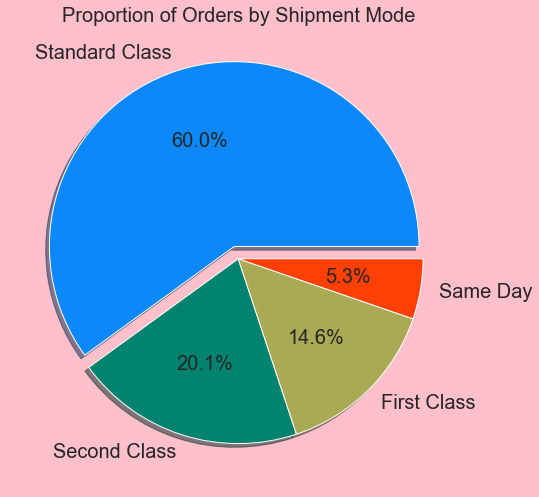

In [38]:
color = ['#0c88fb','#018370','#aaaa55','#ff4004']
exp = [0.07,0,0,0] 
plt.pie(s1['% of Orders'],labels=s1['index'],colors=color,explode=exp,shadow=True,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.gcf().set_size_inches(18,8.5) 
plt.title('Proportion of Orders by Shipment Mode',fontsize=20)
sns.set(rc={'figure.facecolor':'#F08080'})#'axes.facecolor':'#ccccff'

In [39]:
print(df['Customer ID'].nunique())
df.groupby('Customer ID').sum()[['Sales','Quantity']].sort_values('Sales',ascending=False).head(int(len(df)*1/100))


17415


,Sales,Quantity
Customer ID,,
SM-203201408,23669.196,27
TC-209801402,18437.138,24
RB-193601404,14345.276,23
TA-213851406,13723.498,22
AB-101051402,12181.594,48
...,...,...
DS-1318093,3486.320,21
TB-211751408,3482.878,26
TM-2101048,3480.111,19


# Some insights

-Top 3% customers based on sales amount and quantity purchased. 512 customers out of 17415 who are most loyal and frequent buyers.

-We can separate these customers from the rest and provide them with frequent discounts/offers to retain them.

In [40]:
d1 = df.groupby('Category')[['Sales','Quantity','Profit']].sum()
d2 = d1.apply(lambda x: 100*x/(x.sum()))
d2 = d2.reset_index()
d2 



,Category,Sales,Quantity,Profit
0,Furniture,32.512962,19.567948,19.426987
1,Office Supplies,29.958410,60.704832,35.339756
2,Technology,37.528628,19.727220,45.233257


# Some insights

-Here we see although Office Supplies are the most ordered in quantity, the Tech products generate most profit for the store.

-Also, furniture produces more sales than Offics Supplies but is the least profitable category amongst the 3.

-Tech produts produce the maximum sales and profit of all three.

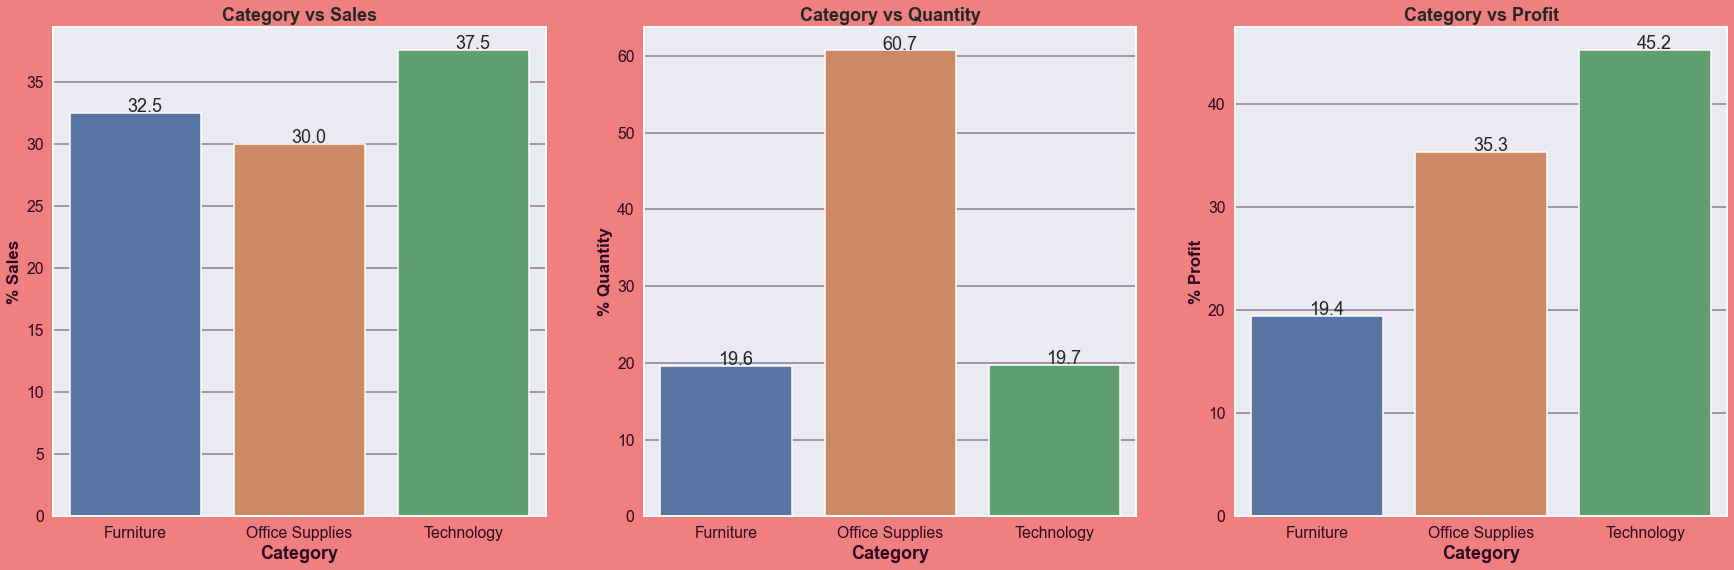

In [41]:
sns.set_context('talk',font_scale=1.5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,9))
sns.barplot(data=d2,x='Category',y='Sales',ax=ax1,ci=None,estimator=np.sum)
for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1),size=18)
sns.barplot(data=d2,x='Category',y='Quantity',ax=ax2,ci=None,estimator=np.sum)
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1),size=18)
sns.barplot(data=d2,x='Category',y='Profit',ax=ax3,ci=None,estimator=np.sum)
for p in ax3.patches:
   ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1),size=18)
ax1.set_title('Category vs Sales',fontsize=18,fontweight='bold')
ax1.set_xlabel('Category',fontsize=18,color='#300923',fontweight='bold')
ax1.set_ylabel('% Sales',fontsize=17,color='#300923',fontweight='bold')
ax1.tick_params(axis='both', labelsize=15.8,length=6, width=2, colors='#300923',grid_color='#300923', grid_alpha=0.5)
#ax1.set_facecolor('pink')
ax2.set_title('Category vs Quantity',fontsize=18,fontweight='bold')
ax2.set_xlabel('Category',fontsize=18,color='#300923',fontweight='bold')
ax2.set_ylabel('% Quantity',fontsize=17,color='#300923',fontweight='bold')
ax2.tick_params(axis='both', labelsize=15.8,length=6, width=2, colors='#300923',grid_color='#300923', grid_alpha=0.5)
#ax2.set_facecolor('pink')
ax3.set_title('Category vs Profit',fontsize=18,fontweight='bold')
ax3.set_xlabel('Category',fontsize=18,color='#300923',fontweight='bold')
ax3.set_ylabel('% Profit',fontsize=17,color='#300923',fontweight='bold')
ax3.tick_params(axis='both', labelsize=15.8,length=6, width=2, colors='#300923',grid_color='#300923', grid_alpha=0.5)#b12450
#ax3.set_facecolor('pink')
sns.set(rc={'axes.facecolor':'pink','figure.facecolor':'#9966cc'})#9966cc

In [42]:
a1 = df.groupby('Segment').agg({'Profit':'sum'})
a1.reset_index()
a1['Total'] = a1.Profit.sum()
a1['Profit Share'] = a1['Profit']/a1['Total']*100
a1.reset_index(inplace=True)
a1

,Segment,Profit,Total,Profit Share
0,Consumer,749239.78206,1.467457e+06,51.057008
1,Corporate,441208.32866,1.467457e+06,30.066179
2,Home Office,277009.18056,1.467457e+06,18.876814


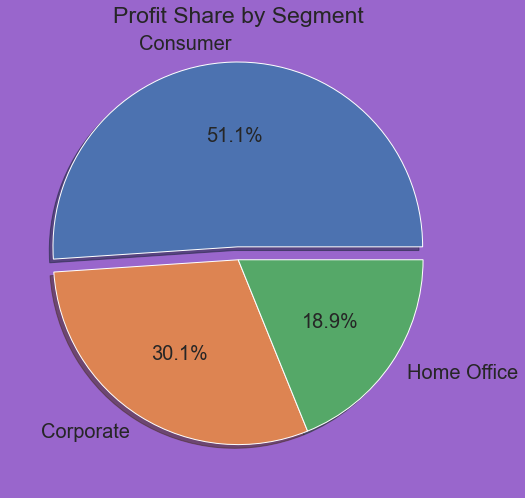

In [43]:
exp = [0.07,0,0] 
plt.pie(a1['Profit Share'],labels=a1['Segment'],explode=exp,shadow=True,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.gcf().set_size_inches(19,8.5) 
plt.title('Profit Share by Segment',fontsize=23)
sns.set(rc={'figure.facecolor':'#F08080'})#'axes.facecolor':'#ccccff'

In [44]:
a2 = df.groupby('Country')[['Sales']].sum().sort_values('Sales',ascending=False).head(10)
a2.reset_index(inplace=True)
a2 #Top 10 countries generating most sales.

,Country,Sales
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,France,8.589311e+05
3,China,7.005620e+05
4,Germany,6.281362e+05
5,Mexico,6.215526e+05
6,India,5.894860e+05
7,United Kingdom,5.285763e+05
8,Indonesia,4.048875e+05
9,Brazil,3.599249e+05


In [45]:
a2 = df.groupby('Country')[['Sales']].sum()
a3 = a2.apply(lambda x: 100*x/x.sum())
a3 = a3.sort_values('Sales',ascending=False).reset_index()
a3.rename({'Sales':'% Sales'},axis=1,inplace=True)
a4 = a3.head(10)
a4

,Country,% Sales
0,United States,18.170461
1,Australia,7.318455
2,France,6.793996
3,China,5.541324
4,Germany,4.968448
5,Mexico,4.916374
6,India,4.662732
7,United Kingdom,4.180947
8,Indonesia,3.202590
9,Brazil,2.846943


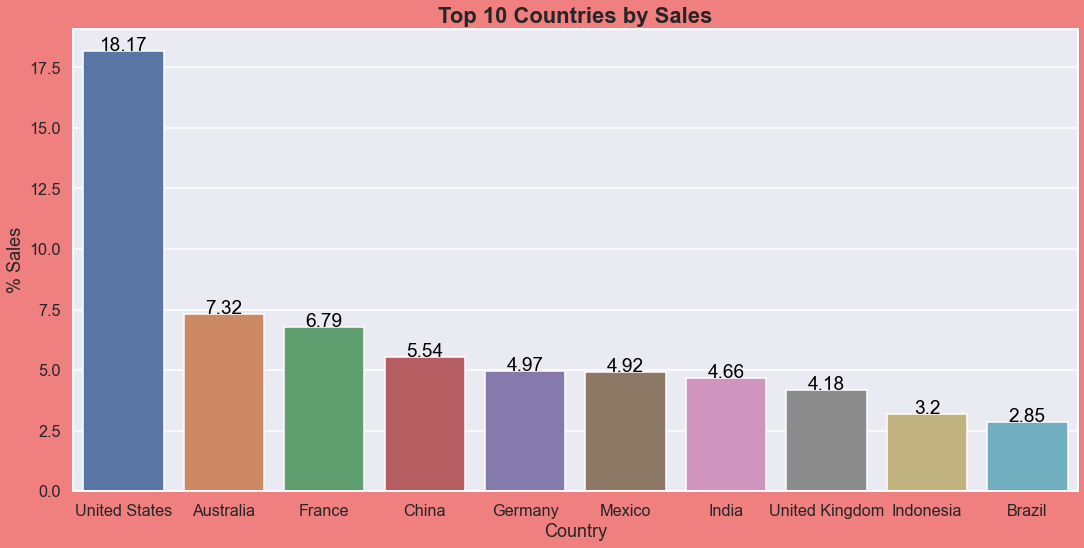

In [46]:
sns.set_context('talk')
h = sns.barplot(data=a4,x='Country',y='% Sales',ci=None,estimator=np.sum)
for index, row in a4.iterrows():
    h.text(row.name,row['% Sales'], round(row['% Sales'],2), fontsize= 19, color='black', ha="center")
plt.gcf().set_size_inches(18,8.5)
plt.tick_params(axis='both', labelsize=16.2)
plt.title('Top 10 Countries by Sales',fontsize=22,fontweight='bold')
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'})

In [47]:
a2 = df.groupby('Country').sum()[['Profit']]
a2.reset_index()
a2['Total'] = a2.Profit.sum()
a2['Profit Share'] = a2['Profit']/a2['Total']*100
a3 = a2.sort_values('Profit Share',ascending=False).head(10)
a3.reset_index(inplace=True)
a3 #Top 10 countries based on generated profit.

,Country,Profit,Total,Profit Share
0,United States,286397.02170,1.467457e+06,19.516549
1,China,150683.08500,1.467457e+06,10.268311
2,India,129050.59500,1.467457e+06,8.794164
3,United Kingdom,111900.15000,1.467457e+06,7.625445
4,France,109029.00300,1.467457e+06,7.429791
5,Germany,107190.32550,1.467457e+06,7.304494
6,Australia,103907.43300,1.467457e+06,7.080781
7,Mexico,102453.58552,1.467457e+06,6.981708
8,Spain,54390.12000,1.467457e+06,3.706419
9,El Salvador,42023.24320,1.467457e+06,2.863677


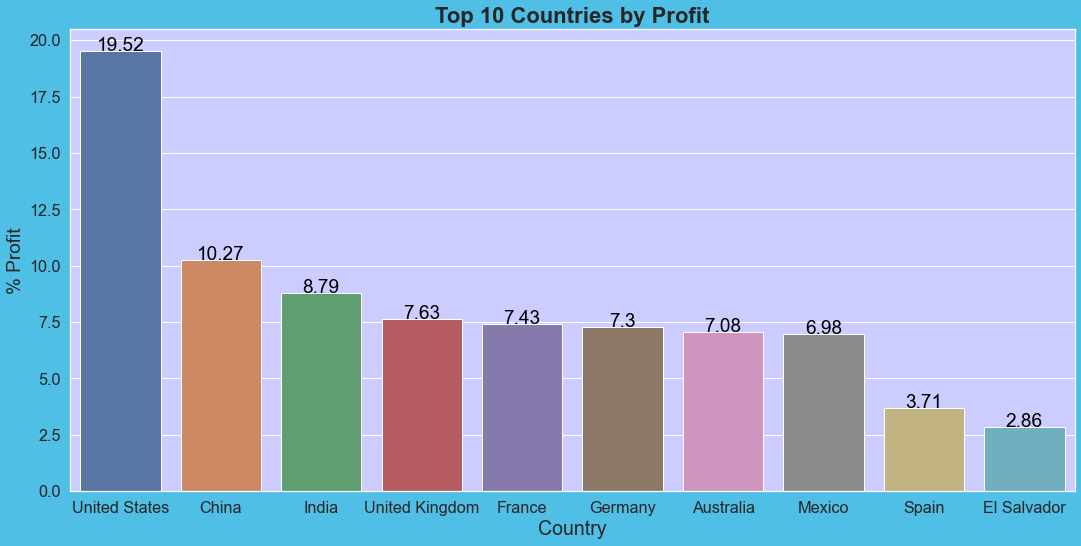

In [48]:
h = sns.barplot(data=a3,x='Country',y='Profit Share',ci=None,estimator=np.sum)
for index, row in a3.iterrows():
    h.text(row.name,row['Profit Share'], round(row['Profit Share'],2), fontsize= 19, color='black', ha="center")
plt.gcf().set_size_inches(18,8.5)
plt.tick_params(axis='both', labelsize=16.2)
plt.xlabel('Country',fontsize=19.6)
plt.ylabel('% Profit',fontsize=19)
plt.title('Top 10 Countries by Profit',fontsize=22,fontweight='bold')
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'})

In [49]:
a3 = df.groupby('Market').sum()[['Profit']]
a3.reset_index()
a3['Total'] = a3.Profit.sum()
a3['Profit Share'] = a3['Profit']/a3['Total']*100
a4 = a3.sort_values('Profit Share',ascending=False)
a4.reset_index(inplace=True) 
a4 

,Market,Profit,Total,Profit Share
0,Europe,449551.72350,1.467457e+06,30.634740
1,Asia Pacific,403176.03800,1.467457e+06,27.474465
2,USCA,304214.41170,1.467457e+06,20.730717
3,LATAM,221643.48708,1.467457e+06,15.103914
4,Africa,88871.63100,1.467457e+06,6.056165


# Some insights

-Europe and Asia Pacific are the most profitable markets with around 58% of total profits coming from them.

-Africa is the least profitable generating 6% of total profit.

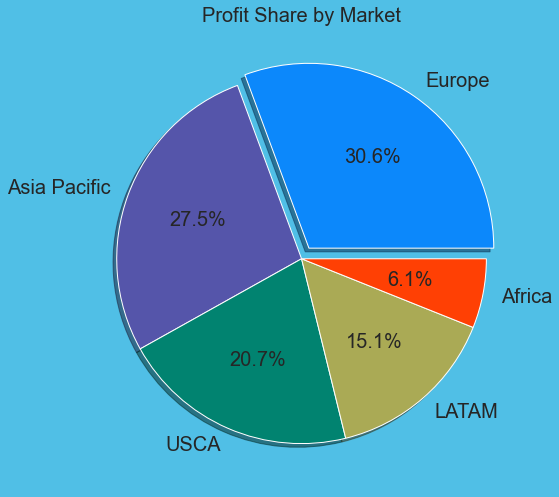

In [50]:
color = ['#0c88fb','#5555aa','#018370','#aaaa55','#ff4004']
exp = [0.07,0,0,0,0] 
plt.pie(a4['Profit Share'],labels=a4['Market'],colors=color,explode=exp,shadow=True,autopct='%1.1f%%',textprops={'fontsize': 20})
plt.gcf().set_size_inches(17,8.5) 
plt.title('Profit Share by Market',fontsize=20)
sns.set(rc={'figure.facecolor':'#F08080'})#'axes.facecolor':'#ccccff'

In [51]:
filt = df['Profit']<0
df.loc[filt,['Category','Sub-Category','Segment','Product Name','Sales','Shipping Cost','Profit']].sort_values('Profit')


,Category,Sub-Category,Segment,Product Name,Sales,Shipping Cost,Profit
47386,Technology,Machines,Consumer,Cubify CubeX 3D Printer Double Head Print,4499.9850,451.630,-6599.9780
38044,Technology,Phones,Corporate,"Motorola Smart Phone, Cordless",3085.3440,51.890,-4088.3760
46865,Technology,Machines,Corporate,Cubify CubeX 3D Printer Triple Head Print,7999.9800,674.820,-3839.9904
49593,Office Supplies,Binders,Consumer,GBC DocuBind P400 Electric Binding System,2177.5840,172.070,-3701.8928
43040,Technology,Machines,Home Office,Lexmark MX611dhe Monochrome Laser Printer,2549.9850,120.310,-3399.9800
...,...,...,...,...,...,...,...
1123,Furniture,Bookcases,Corporate,"Safco Stackable Bookrack, Pine",270.5940,22.680,-0.0060
666,Furniture,Bookcases,Consumer,"Safco Library with Doors, Pine",156.4560,12.499,-0.0040
16986,Furniture,Chairs,Consumer,"Office Star Swivel Stool, Adjustable",158.7870,3.040,-0.0030
36748,Furniture,Furnishings,Consumer,"Rubbermaid Frame, Black",561.5379,34.260,-0.0021


# Some insights

-Around 12.5k transactions incur loss for the store.

-Appears the items which cost the store a certain amount, were eventually sold after a long time when the price of those items fell considerably.

-Also, the shipping cost rose with time adding to the losses.

-We could suggest the store to limit the stocking of these products to minimize their losses.

In [52]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium


In [53]:
df['Shipment Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipment Days
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,7
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,3


In [54]:
df['Order Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Ship Year'] = pd.DatetimeIndex(df['Ship Date']).year
df['Ship Month'] = pd.DatetimeIndex(df['Ship Date']).month
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipment Days,Order Year,Order Month,Ship Year,Ship Month
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,7,2017,3,2017,3
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,3,2015,9,2015,9


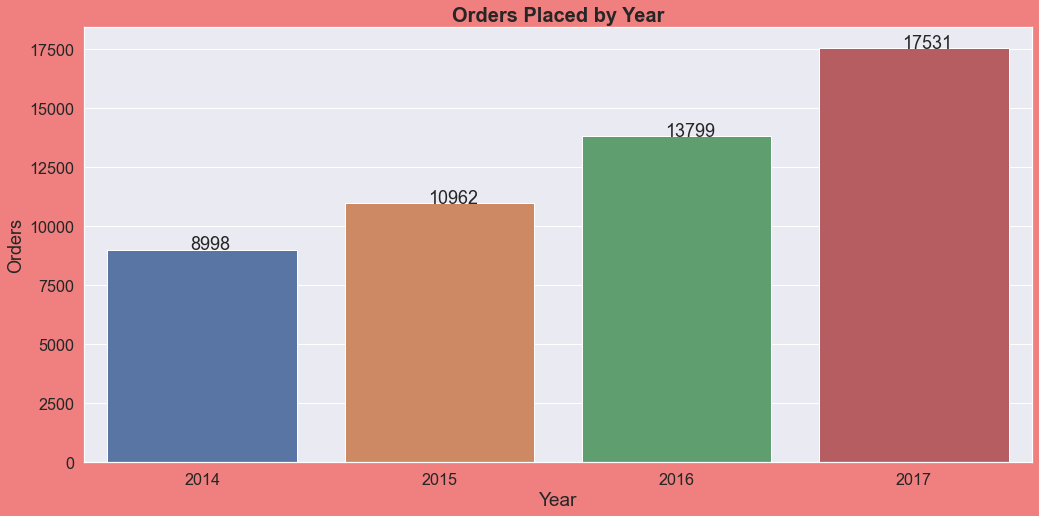

In [55]:
h = sns.countplot(data=df,x='Order Year')#,order = df['Order Year'].value_counts().index
for p in h.patches:
   h.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1),size=18)
plt.tick_params(axis='both', labelsize=16.2)
plt.xlabel('Year',fontsize=19)
plt.ylabel('Orders',fontsize=18)
plt.title('Orders Placed by Year',fontsize=20,fontweight='bold')
plt.gcf().set_size_inches(17,8)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#f4a460'})

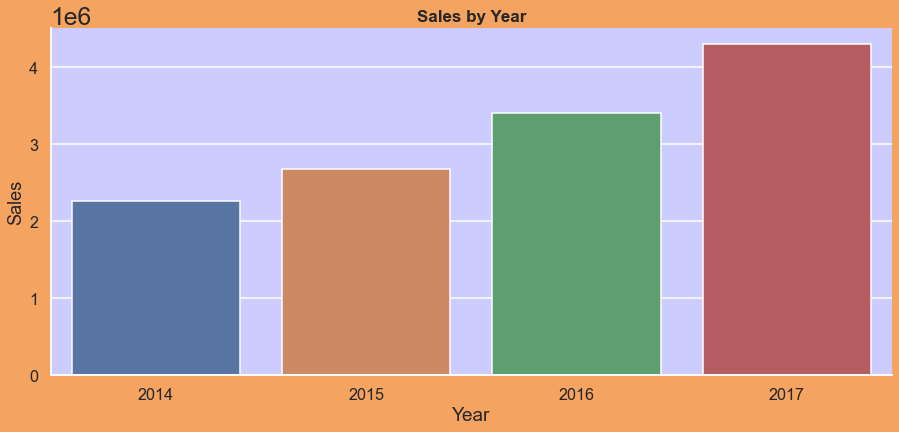

In [56]:
sns.set_context('talk',font_scale=1.5)
ax = sns.catplot(data=df,x='Order Year',y='Sales',kind='bar',ci=None,estimator=np.sum)
plt.tick_params(axis='both', labelsize=16.2)
plt.xlabel('Year',fontsize=19)
plt.ylabel('Sales',fontsize=18)
plt.title('Sales by Year',fontsize=17,fontweight='bold')
plt.gcf().set_size_inches(17,8)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#f4a460'})

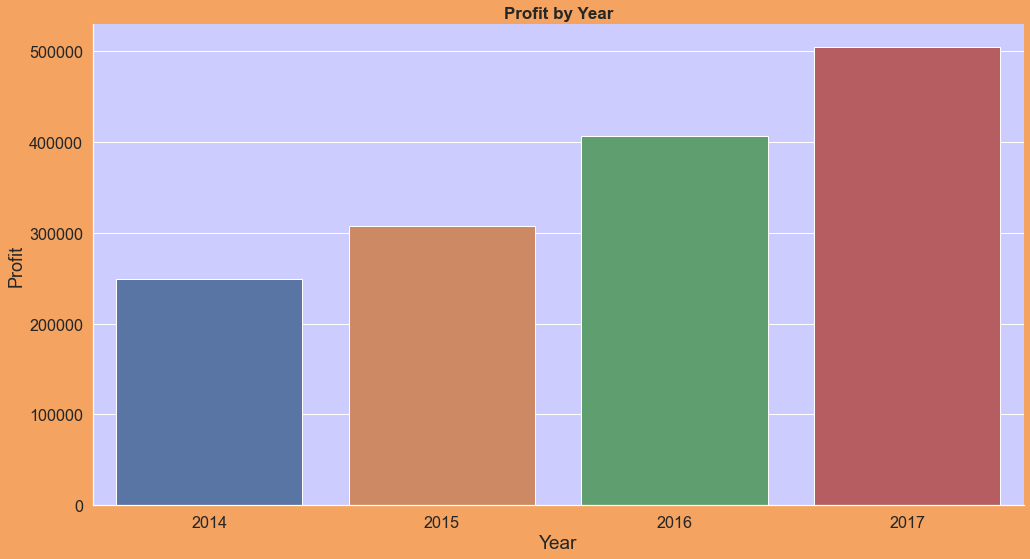

In [57]:
ax = sns.catplot(data=df,x='Order Year',y='Profit',kind='bar',ci=None,estimator=np.sum)
plt.tick_params(axis='both', labelsize=16.2)
plt.xlabel('Year',fontsize=19)
plt.ylabel('Profit',fontsize=18)
plt.title('Profit by Year',fontsize=17,fontweight='bold')
plt.gcf().set_size_inches(17,8)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#f4a460'})

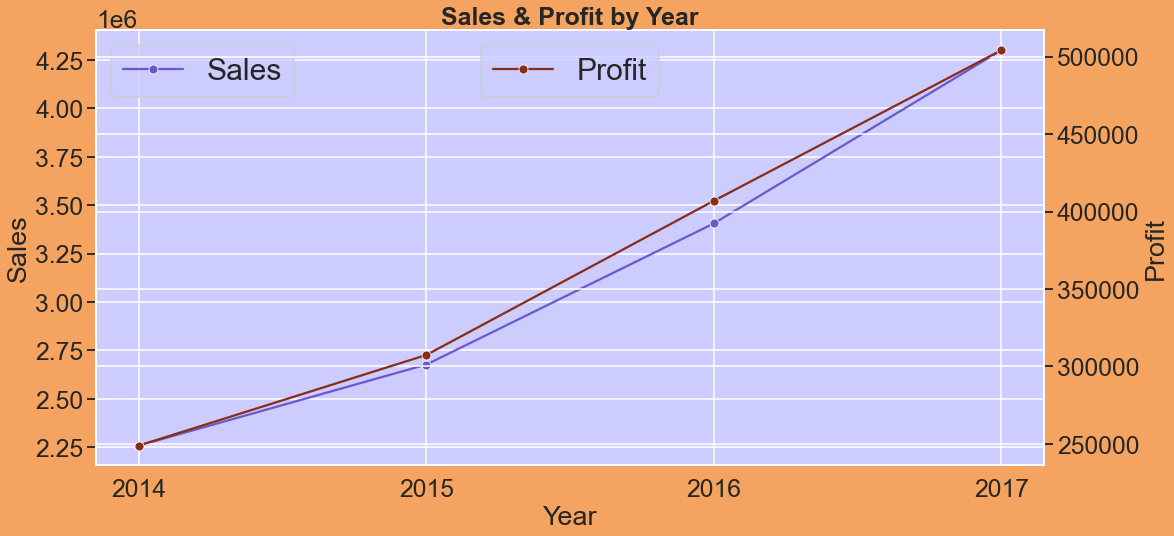

In [58]:
sns.set_context('talk',font_scale=1.5)
ax = sns.lineplot(data=df,x='Order Year',y='Sales',ci=None,estimator=np.sum,color='#6a5acd',marker='o')
plt.xlabel('Year')
ax2 = ax.twinx()
sns.lineplot(data=df,x='Order Year',y='Profit',ci=None,ax=ax2,estimator=np.sum,color='#882d17',marker='o')
plt.title('Sales & Profit by Year',fontsize=25,fontweight='bold')
plt.gcf().set_size_inches(17,8)
plt.xticks(np.arange(2014,2018,1))
ax.legend(loc=2,labels=['Sales'],fontsize=30)
ax2.legend(loc='upper center',labels=['Profit'],fontsize=30)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#f4a460'}) 

In [59]:
#No. of Customers by Country
#Per capita demand by-Country,Category
#(No. of orders in a Country/Total Customers in that country)*1000
#Returns Data

In [60]:
g = pd.DataFrame(df.groupby(['Country'])['Customer ID'].count())
Orders_Country = g.rename(columns={'Customer ID':'OrderCount'}).reset_index()
Orders_Country

,Country,OrderCount
0,Afghanistan,55
1,Albania,16
2,Algeria,196
3,Angola,122
4,Argentina,390
...,...,...
160,Vietnam,263
161,Western Sahara,2
162,Yemen,30
163,Zambia,102


In [61]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipment Days,Order Year,Order Month,Ship Year,Ship Month
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium,7,2017,3,2017,3
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,Hirat,Afghanistan,Southern Asia,Asia Pacific,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium,3,2015,9,2015,9


In [62]:
#Calculate count of unique values of 'Customer ID' column by group 'Country'.
g2 = pd.DataFrame(df.groupby(['Country']).agg({'Customer ID':'nunique'}))
Cust_Country = g2.reset_index()
Cust_Country.rename(columns={'Customer ID':'CustCount'},inplace=True)
Cust_Country

,Country,CustCount
0,Afghanistan,25
1,Albania,10
2,Algeria,86
3,Angola,59
4,Argentina,169
...,...,...
160,Vietnam,112
161,Western Sahara,1
162,Yemen,11
163,Zambia,46


In [63]:
left_join = pd.merge(Orders_Country,Cust_Country,on='Country',how='left')
left_join.head(3)

,Country,OrderCount,CustCount
0,Afghanistan,55,25
1,Albania,16,10
2,Algeria,196,86


In [64]:
#Demand per 1000 Customers in each Country.
left_join['Demand'] = left_join['OrderCount']/left_join['CustCount']*1000
d5 = left_join.sort_values('Demand',ascending=False).head(10)
d5

,Country,OrderCount,CustCount,Demand
32,Costa Rica,7,1,7000.000000
22,Burkina Faso,6,1,6000.000000
6,Australia,2837,660,4298.484848
50,France,2827,679,4163.475700
19,Botswana,4,1,4000.000000
156,United States,9994,2501,3996.001599
94,Mexico,2635,668,3944.610778
54,Germany,2063,581,3550.774527
30,China,1880,549,3424.408015
20,Brazil,1593,469,3396.588486


In [ ]:
wb = pd.read_excel('D:/WB Data.xls')
wb.head(3)

In [ ]:
d5 = pd.merge(left_join,wb,on='Country',how='left')
d5 = d5[['Country','OrderCount','Population']]
d5['Population'].isna().sum()

In [ ]:
d5['PCD'] = d5['OrderCount']/d5['Population']*1000
d5 = d5.sort_values('PCD',ascending=False).head(10)
d5

In [ ]:
h = sns.barplot(data=d5,x='Country',y='PCD',ci=None,estimator=np.sum)
for p in h.patches:
   h.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.0001),size=18)
plt.tick_params(axis='both', labelsize=16.2)
plt.xlabel('Country',fontsize=19)
plt.ylabel('Orders/1000 Popn.',fontsize=18)
plt.title('Top 10 Countries by Orders Per 1000 Population',fontsize=20,fontweight='bold')
plt.gcf().set_size_inches(22.5,8)
sns.set(rc={'axes.facecolor':'#ccccff','figure.facecolor':'#50bfe6'}) 

In [66]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib